In [81]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [82]:
df=pd.read_csv(r"C:\Users\hp\Downloads\DiabeticData\diabetes.csv")

In [83]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
df.shape

(768, 9)

In [85]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [91]:
df[["Glucose", "BloodPressure",  "SkinThickness", "Insulin", "BMI" ]]=df[["Glucose", "BloodPressure",  "SkinThickness", "Insulin", "BMI" ]].replace({0: np.nan})

In [92]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [93]:
df1=df.fillna(df.median())           # fill missing values

In [94]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
from sklearn.impute import SimpleImputer

In [115]:
sm=SimpleImputer(strategy="median")           # only work on numerical
df1=sm.fit_transform(df)
df2=pd.DataFrame(df1, columns=df.columns)          
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [116]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.50
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [95]:
def univariate_num(data, x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min() , 2)
    max1=round(data[x].max() , 2)
    mean=round(data[x].mean() , 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    my_value={"missing": missing, "min": min1, "max": max1, "mean":mean, "var": var, "std":std,
             "range":range1, "q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=(data[x]))
    return my_value

In [ ]:
univariate_num(data=df1, x="Pregnancies")

In [103]:
var="Pregnancies"
q1=df1[var].quantile(.25)
q3=df1[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df1[var]=np.where(df1[var]>=upper_cap, upper_cap, df1[var])
df1[var]=np.where(df1[var]<=lower_cap, lower_cap, df1[var])

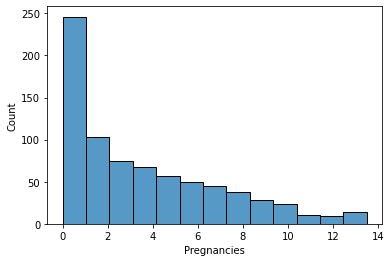

{'missing': 0,
 'min': 0.0,
 'max': 13.5,
 'mean': 3.84,
 'var': 11.18,
 'std': 3.34,
 'range': 13.5,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 6.0,
 'skewness': 0.85,
 'kurtosis': -0.07}

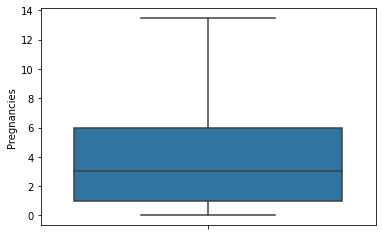

In [104]:
univariate_num(data=df1, x="Pregnancies")

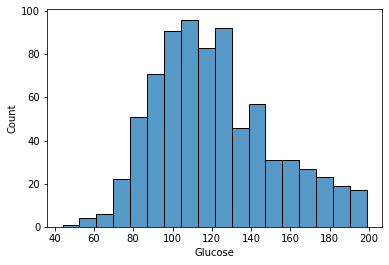

{'missing': 0,
 'min': 44.0,
 'max': 199.0,
 'mean': 121.66,
 'var': 926.49,
 'std': 30.44,
 'range': 155.0,
 'q1': 99.75,
 'q2': 117.0,
 'q3': 140.25,
 'skewness': 0.54,
 'kurtosis': -0.26}

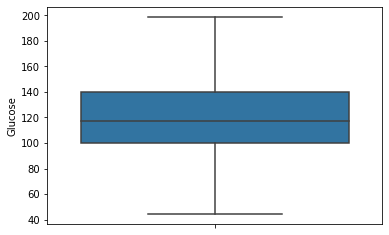

In [105]:
univariate_num(data=df1, x="Glucose")

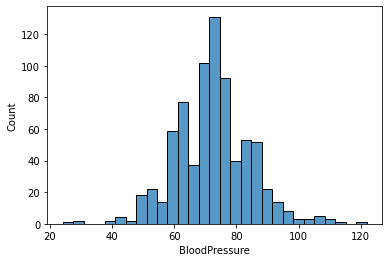

{'missing': 0,
 'min': 24.0,
 'max': 122.0,
 'mean': 72.39,
 'var': 146.33,
 'std': 12.1,
 'range': 98.0,
 'q1': 64.0,
 'q2': 72.0,
 'q3': 80.0,
 'skewness': 0.14,
 'kurtosis': 1.1}

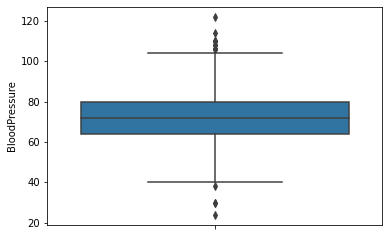

In [107]:
univariate_num(data=df1, x="BloodPressure")

In [108]:
var="BloodPressure"
q1=df1[var].quantile(.25)
q3=df1[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df1[var]=np.where(df1[var]>=upper_cap, upper_cap, df1[var])
df1[var]=np.where(df1[var]<=lower_cap, lower_cap, df1[var])

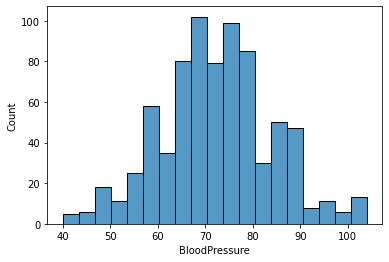

{'missing': 0,
 'min': 40.0,
 'max': 104.0,
 'mean': 72.36,
 'var': 136.82,
 'std': 11.7,
 'range': 64.0,
 'q1': 64.0,
 'q2': 72.0,
 'q3': 80.0,
 'skewness': 0.11,
 'kurtosis': 0.21}

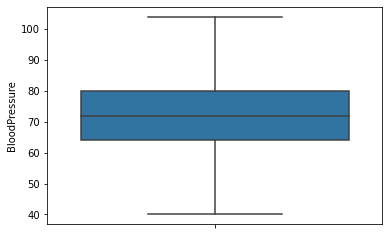

In [110]:
univariate_num(data=df1, x="BloodPressure")

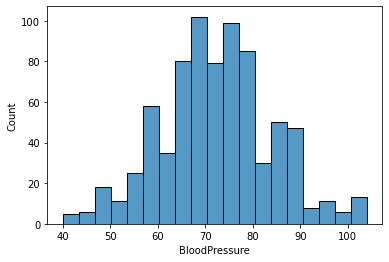

{'missing': 0,
 'min': 40.0,
 'max': 104.0,
 'mean': 72.36,
 'var': 136.82,
 'std': 11.7,
 'range': 64.0,
 'q1': 64.0,
 'q2': 72.0,
 'q3': 80.0,
 'skewness': 0.11,
 'kurtosis': 0.21}

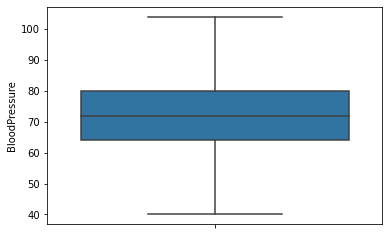

In [109]:
univariate_num(data=df1, x="BloodPressure")

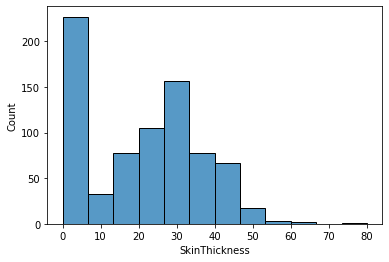

{'missing': 0,
 'min': 0.0,
 'max': 80.0,
 'mean': 20.51,
 'var': 251.06,
 'std': 15.84,
 'range': 80.0,
 'q1': 0.0,
 'q2': 23.0,
 'q3': 32.0,
 'skewness': 0.03,
 'kurtosis': -0.98}

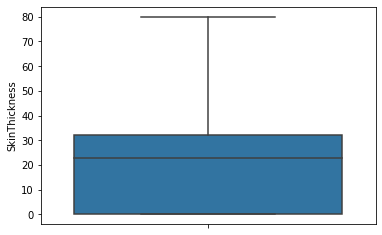

In [45]:
univariate_num(data=df, x="SkinThickness")

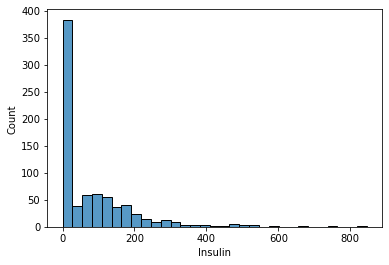

{'missing': 0,
 'min': 0,
 'max': 846,
 'mean': 79.8,
 'var': 13281.18,
 'std': 115.24,
 'range': 846,
 'q1': 0.0,
 'q2': 30.5,
 'q3': 127.25,
 'skewness': 2.27,
 'kurtosis': 7.21}

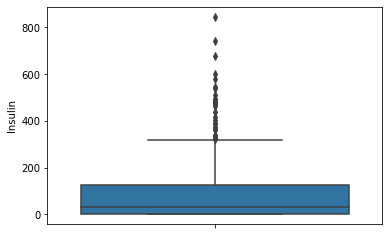

In [46]:
univariate_num(data=df, x="Insulin")

In [47]:
var="Insulin"
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df[var]=np.where(df[var]>=upper_cap, upper_cap, df[var])
df[var]=np.where(df[var]<=lower_cap, lower_cap, df[var])

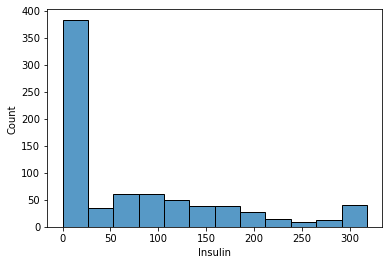

{'missing': 0,
 'min': 0.0,
 'max': 318.12,
 'mean': 73.65,
 'var': 8756.47,
 'std': 93.58,
 'range': 318.12,
 'q1': 0.0,
 'q2': 30.5,
 'q3': 127.25,
 'skewness': 1.17,
 'kurtosis': 0.41}

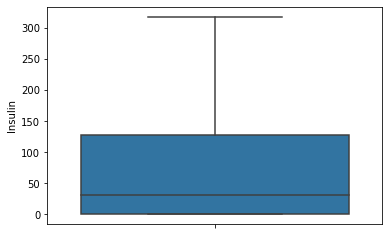

In [48]:
univariate_num(data=df, x="Insulin")

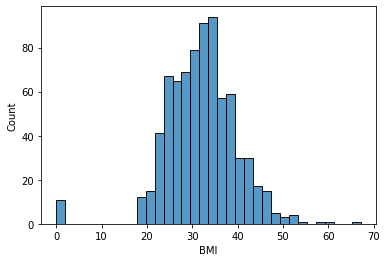

{'missing': 0,
 'min': 0.0,
 'max': 67.1,
 'mean': 31.99,
 'var': 62.16,
 'std': 7.88,
 'range': 67.1,
 'q1': 27.3,
 'q2': 32.0,
 'q3': 36.6,
 'skewness': -0.43,
 'kurtosis': 3.29}

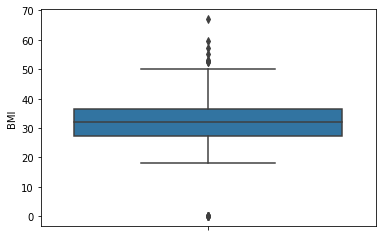

In [49]:
univariate_num(data=df, x="BMI")

In [52]:
var="BMI"
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df[var]=np.where(df[var]>=upper_cap, upper_cap, df[var])
df[var]=np.where(df[var]<=lower_cap, lower_cap, df[var])

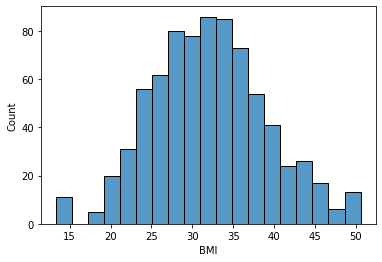

{'missing': 0,
 'min': 13.35,
 'max': 50.55,
 'mean': 32.13,
 'var': 49.7,
 'std': 7.05,
 'range': 37.2,
 'q1': 27.3,
 'q2': 32.0,
 'q3': 36.6,
 'skewness': 0.14,
 'kurtosis': 0.05}

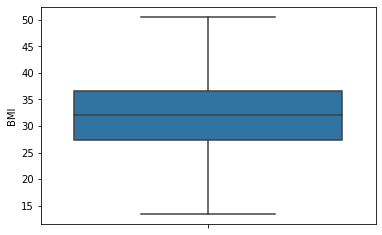

In [53]:
univariate_num(data=df, x="BMI")

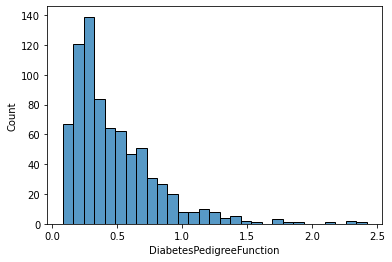

{'missing': 0,
 'min': 0.08,
 'max': 2.42,
 'mean': 0.47,
 'var': 0.11,
 'std': 0.33,
 'range': 2.34,
 'q1': 0.24,
 'q2': 0.37,
 'q3': 0.63,
 'skewness': 1.92,
 'kurtosis': 5.59}

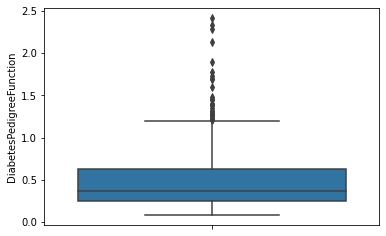

In [54]:
univariate_num(data=df, x="DiabetesPedigreeFunction")

In [55]:
var="DiabetesPedigreeFunction"
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df[var]=np.where(df[var]>=upper_cap, upper_cap, df[var])
df[var]=np.where(df[var]<=lower_cap, lower_cap, df[var])

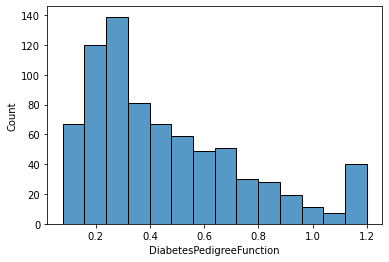

{'missing': 0,
 'min': 0.08,
 'max': 1.2,
 'mean': 0.46,
 'var': 0.08,
 'std': 0.29,
 'range': 1.12,
 'q1': 0.24,
 'q2': 0.37,
 'q3': 0.63,
 'skewness': 1.02,
 'kurtosis': 0.3}

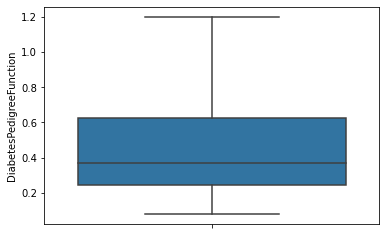

In [56]:
univariate_num(data=df, x="DiabetesPedigreeFunction")

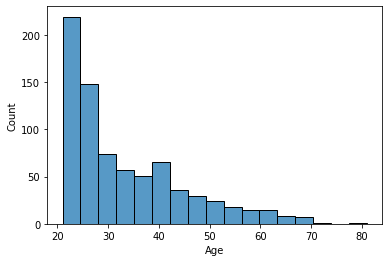

{'missing': 0,
 'min': 21,
 'max': 81,
 'mean': 33.24,
 'var': 138.3,
 'std': 11.76,
 'range': 60,
 'q1': 24.0,
 'q2': 29.0,
 'q3': 41.0,
 'skewness': 1.13,
 'kurtosis': 0.64}

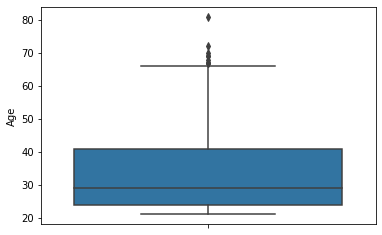

In [57]:
univariate_num(data=df, x="Age")

In [58]:
var="Age"
q1=df[var].quantile(.25)
q3=df[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

df[var]=np.where(df[var]>=upper_cap, upper_cap, df[var])
df[var]=np.where(df[var]<=lower_cap, lower_cap, df[var])

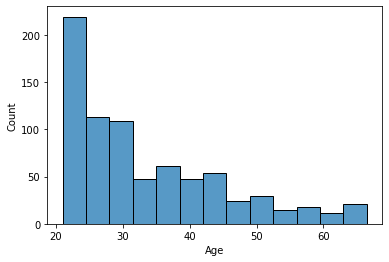

{'missing': 0,
 'min': 21.0,
 'max': 66.5,
 'mean': 33.2,
 'var': 135.22,
 'std': 11.63,
 'range': 45.5,
 'q1': 24.0,
 'q2': 29.0,
 'q3': 41.0,
 'skewness': 1.07,
 'kurtosis': 0.33}

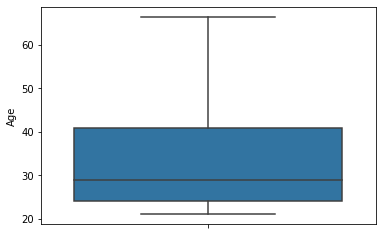

In [59]:
univariate_num(data=df, x="Age")

### Outlier treatmennt

In [119]:
def out(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [120]:
df3=df2.apply(lambda x: out(x))

## Model development

## Logistic

In [165]:
y=df3["Outcome"]
x=df3.drop(columns=["Outcome"])

In [166]:
from sklearn.linear_model import LogisticRegression

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [174]:
logR=LogisticRegression()

In [175]:
logR=LogisticRegression(max_iter=10000, random_state=12)
logR.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=12)

In [176]:
print("Train score:", logR.score(x_train, y_train))
print("Test score:", logR.score(x_test, y_test))

Train score: 0.770949720670391
Test score: 0.7662337662337663


In [127]:
pred_train=logR.predict(x_train)

In [128]:
pd.DataFrame({"Act": y_train, "pred": pred_train})

,Act,pred
762,0.0,0.0
127,0.0,0.0
564,0.0,0.0
375,1.0,1.0
663,1.0,1.0
...,...,...
763,0.0,0.0
192,1.0,1.0
629,0.0,0.0
559,0.0,0.0


In [129]:
act_pred_train=pd.DataFrame({"Act": y_train, "pred": pred_train})

In [130]:
pd.crosstab(act_pred_train["Act"], act_pred_train["pred"])

pred,0.0,1.0
Act,,
0.0,326,44
1.0,93,113


In [131]:
conf_train=metrics.confusion_matrix(y_train, pred_train)   #confusion matricx
conf_train

array([[326,  44],
       [ 93, 113]], dtype=int64)

In [132]:
pd.DataFrame(conf_train, columns=["pred_0_neg", "pred_1_pos"], index=["Act_0_neg", "Act_1_pos"])

,pred_0_neg,pred_1_pos
Act_0_neg,326,44
Act_1_pos,93,113


In [133]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       370
         1.0       0.72      0.55      0.62       206

    accuracy                           0.76       576
   macro avg       0.75      0.71      0.72       576
weighted avg       0.76      0.76      0.75       576



In [134]:
prob_train=pd.DataFrame(logR.predict_proba(x_train), columns=["prob_0","prob_1"])

In [135]:
new_pred_train=np.where(prob_train["prob_1"]>.5,1,0)
print(metrics.classification_report(y_train, new_pred_train))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       370
         1.0       0.72      0.55      0.62       206

    accuracy                           0.76       576
   macro avg       0.75      0.71      0.72       576
weighted avg       0.76      0.76      0.75       576



In [136]:
new_conf_train=metrics.confusion_matrix(y_train, new_pred_train)   #confusion matricx
pd.DataFrame(new_conf_train, columns=["pred_0_neg", "pred_1_pos"],
             index=["Act_0_neg", "Act_1_pos"])

,pred_0_neg,pred_1_pos
Act_0_neg,326,44
Act_1_pos,93,113


## Decision TRee Model

In [137]:
y=df3["Outcome"]
x=df3.drop(columns=["Outcome"])

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [172]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [141]:
dt=DecisionTreeClassifier()
dt.fit(x_train , y_train)

print("Train Accuracy : ", dt.score(x_train, y_train))
print("Test Accuracy : ", dt.score(x_test, y_test))


Train Accuracy :  1.0
Test Accuracy :  0.7662337662337663


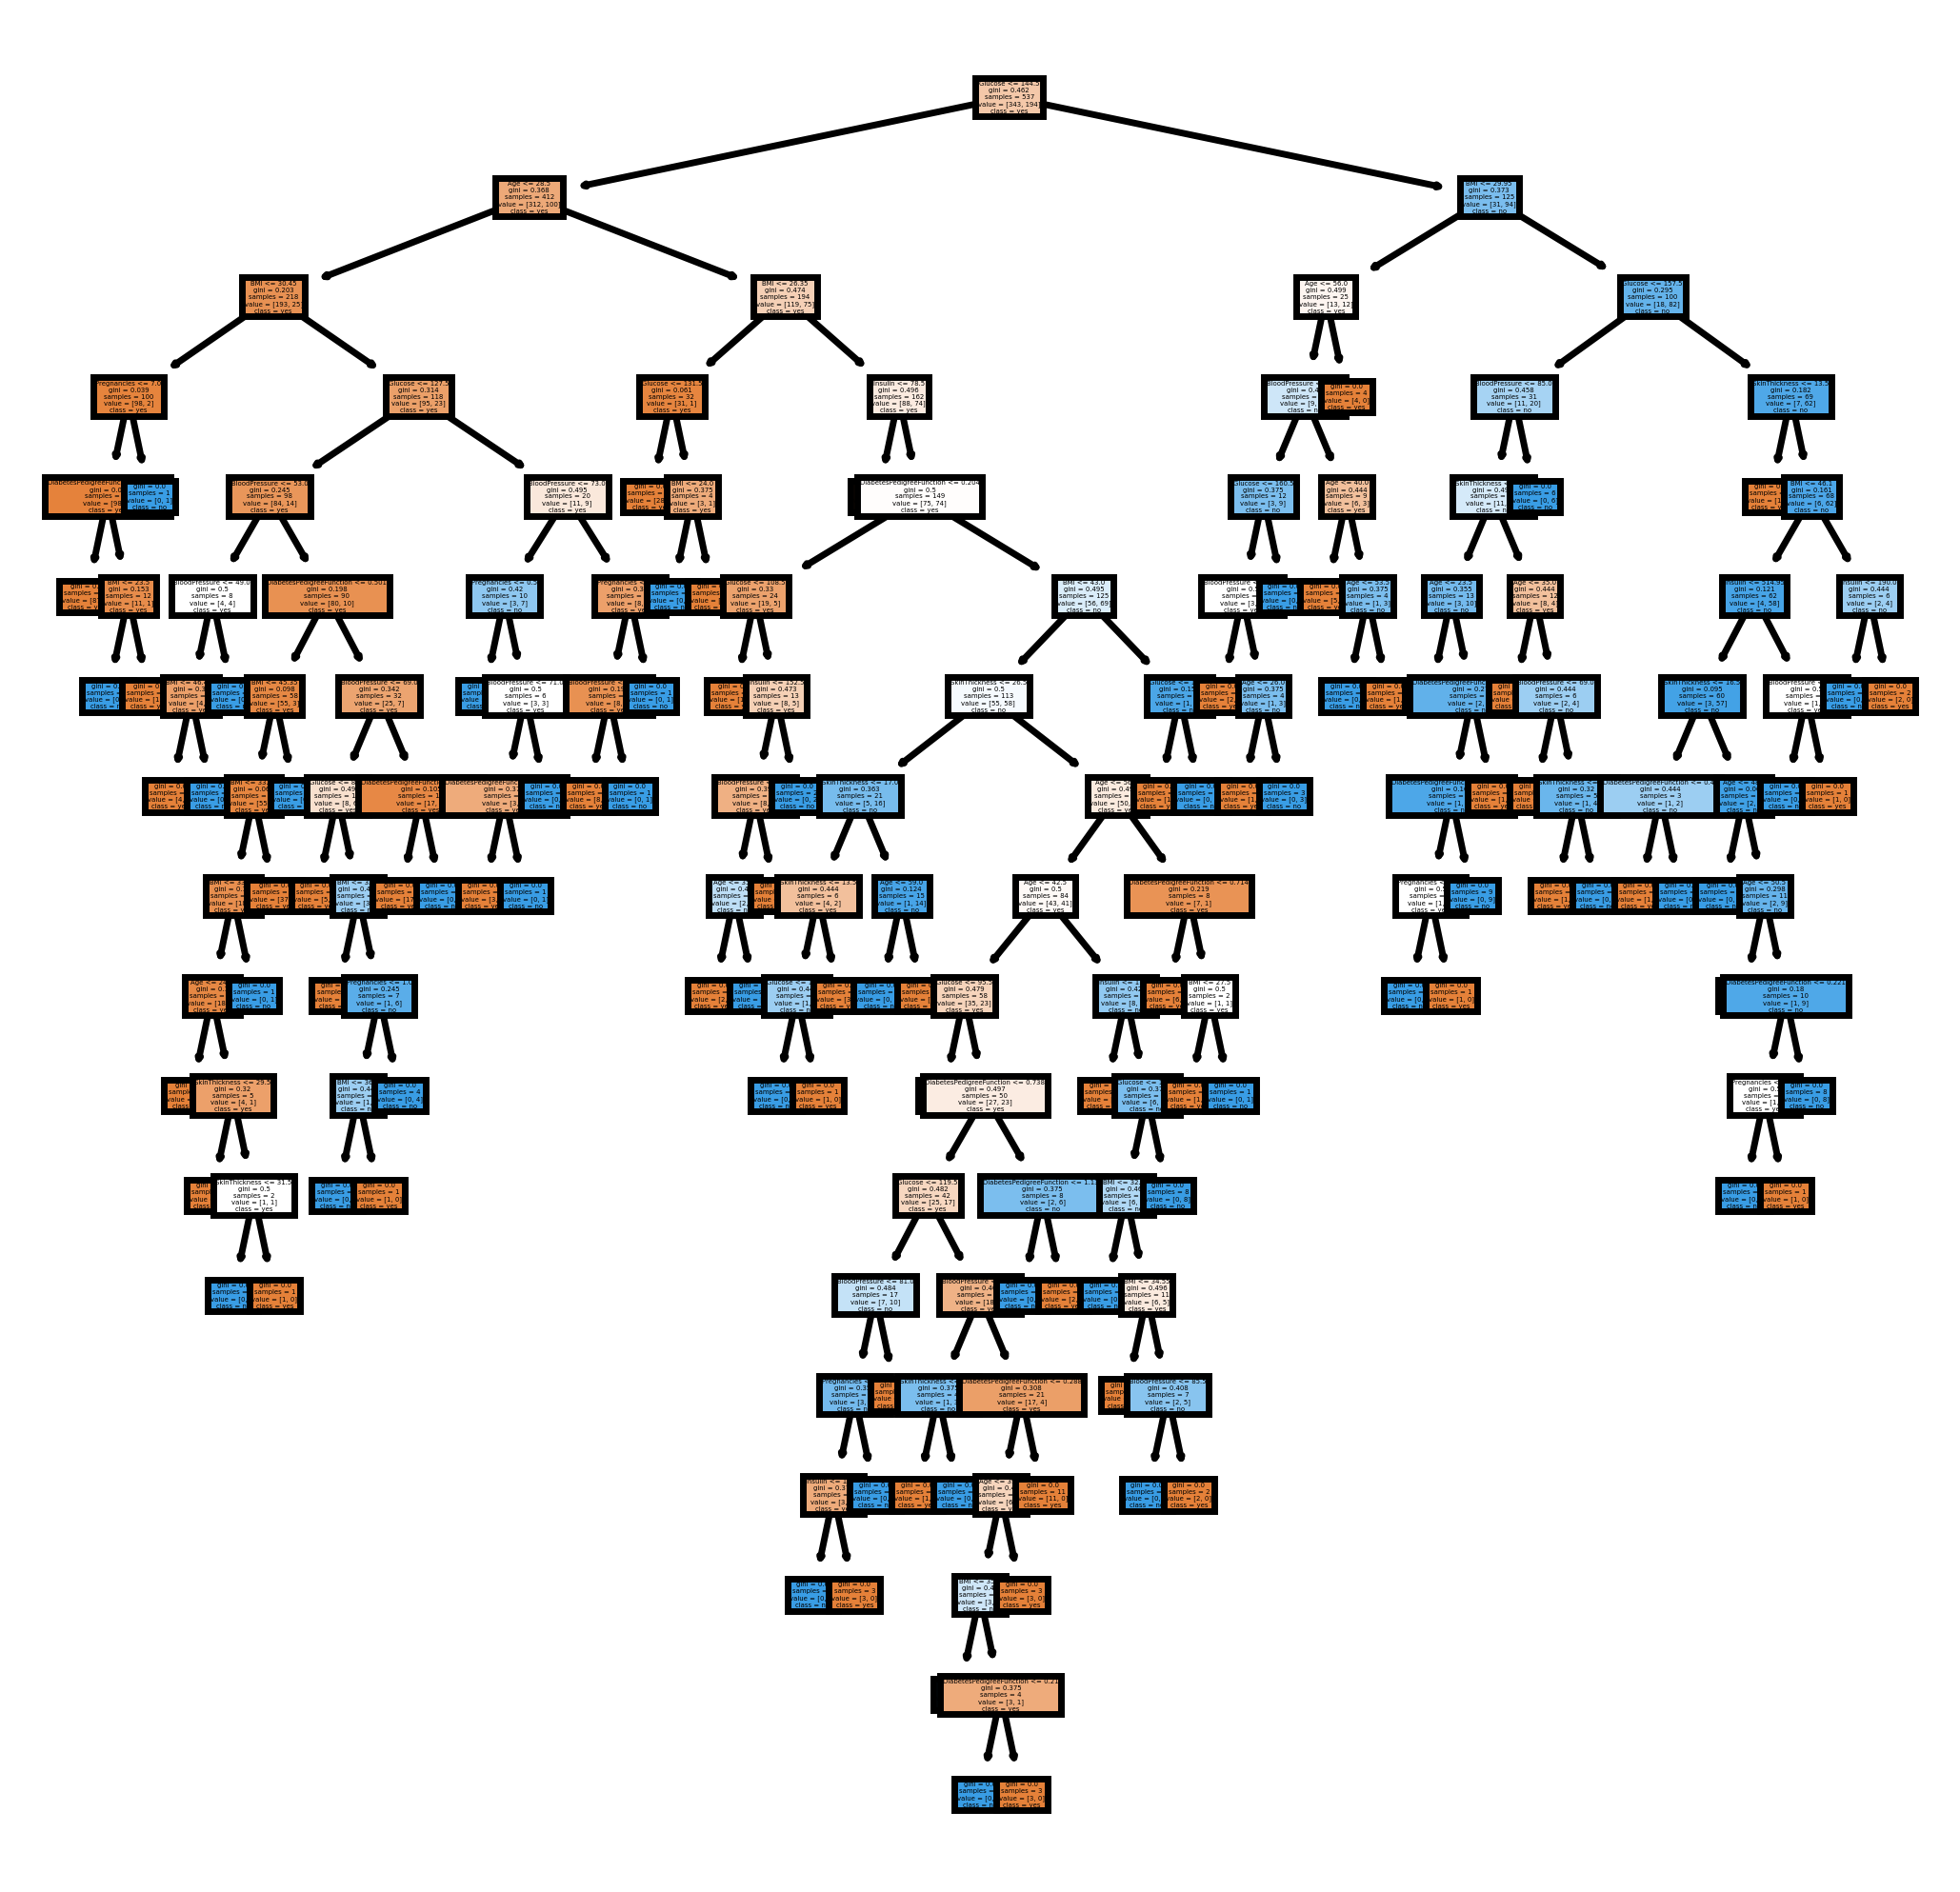

In [142]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes", "no"]
fig, axes = plt.subplots(nrows = 1, ncols = 1 , figsize =(5,5), dpi=500)

dt_plot=plot_tree(dt, 
                 feature_names = fn, 
                 class_names= cn,
                 filled = True);

In [149]:
dt1=DecisionTreeClassifier(max_depth=3)
dt1.fit(x_train , y_train)

print("Train Accuracy : ", round(dt1.score(x_train, y_train), 3))
print("Test Accuracy : ", round(dt1.score(x_test, y_test), 3))

Train Accuracy :  0.764
Test Accuracy :  0.732


## Grid Search

In [150]:
criterion=["gini", "entropy"]
max_depth=[5,7,9,11, 14]
min_sample_split=[10, 15, 20, 50, 100, 200, 250]
min_sample_leaf=[5,10,15,20,50,80,100]

In [157]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion": ["gini", "entropy"],
'max_depth': [2,3,4,5,6],
'min_samples_split' : [10, 15, 20, 50, 100, 200, 250],
'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [158]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 100}

In [159]:
gd_search.best_score_

0.7597833682739343

In [163]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, min_samples_split=100)

In [161]:
pd.DataFrame(gd_search.cv_results_)         # Our detailed result just for saw result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005813,0.003521,0.001802,0.003155,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.740741,...,0.722222,0.833333,0.722222,0.629630,0.698113,0.735849,0.754717,0.739238,0.051344,223
1,0.006376,0.004733,0.003007,0.003723,gini,2,5,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.740741,...,0.722222,0.833333,0.722222,0.629630,0.698113,0.735849,0.754717,0.739238,0.051344,223
2,0.006917,0.006688,0.002817,0.004999,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.740741,...,0.722222,0.833333,0.722222,0.629630,0.698113,0.735849,0.754717,0.739238,0.051344,223
3,0.004389,0.005968,0.002721,0.004971,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.740741,...,0.722222,0.833333,0.722222,0.629630,0.698113,0.735849,0.754717,0.739238,0.051344,223
4,0.005622,0.006446,0.004058,0.006248,gini,2,5,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.740741,...,0.722222,0.833333,0.722222,0.629630,0.698113,0.735849,0.754717,0.739238,0.051344,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.004328,0.006677,0.000000,0.000000,entropy,6,100,20,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.740741,...,0.722222,0.851852,0.722222,0.666667,0.811321,0.754717,0.735849,0.756115,0.049091,17
486,0.007457,0.007527,0.000000,0.000000,entropy,6,100,50,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.740741,...,0.722222,0.851852,0.722222,0.666667,0.811321,0.754717,0.735849,0.756115,0.049091,17
487,0.003126,0.006251,0.001563,0.004688,entropy,6,100,100,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.740741,...,0.722222,0.851852,0.722222,0.666667,0.811321,0.754717,0.735849,0.756115,0.049091,17
488,0.004199,0.006080,0.002099,0.004784,entropy,6,100,200,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.740741,...,0.722222,0.851852,0.722222,0.666667,0.811321,0.754717,0.735849,0.756115,0.049091,17


In [164]:
dt_f=DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, min_samples_split=100)
dt_f.fit(x_train, y_train)
print("Train Accuracy : " +str(round(dt1.score(x_train, y_train), 2)*100)+str('%'))
print("Test Accuracy : " +str(round(dt1.score(x_test, y_test), 2)*100)+str('%'))

Train Accuracy : 76.0%
Test Accuracy : 73.0%


#### Descision tree params by sir

In [197]:
params={
    "criterion": ["gini", "entropy"],
'max_depth': [2,4,6, 8,11],
'min_samples_split' : [20, 30,50,70, 100, 120],
'min_samples_leaf': [1,3,5,7,9,12,15,20]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=5, n_jobs=-1, verbose=2, refit=True)       # refit=first start on cv after
                                                                                                        #best result run on original data

gd_search.fit(x_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 11],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 12, 15, 20],
                         'min_samples_split': [20, 30, 50, 70, 100, 120]},
             verbose=2)

In [198]:
gd_search.best_score_

0.7504153686396677

In [199]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 50}

In [200]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=50)

In [202]:
dtf=DecisionTreeClassifier(criterion='gini', max_depth=7,
                            min_samples_leaf=20,
                            min_samples_split=50)
dtf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=50)

In [204]:
print("train score : ", dtf.score(x_train, y_train))
print("test score : ", dtf.score(x_test, y_test))

train score :  0.7970204841713222
test score :  0.7662337662337663


In [208]:
pred_train=logR.predict(x_train)
perd_test=logR.predict(x_test)

In [217]:
prob_train_1=logR.predict_proba(x_train)[:, 1]
prob_test_1=logR.predict_proba(x_test)[:, 1]

In [212]:
from sklearn import metrics


In [205]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    roc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy" : ac1, "Recall" : rc1, "Precision": pc1, "F1_score" : f1 , "Auc": roc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act, probs)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

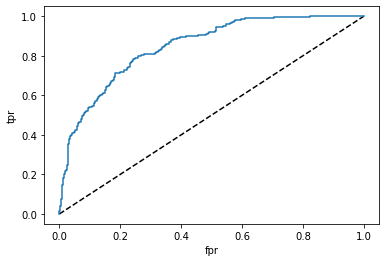

{'Accuracy': 0.770949720670391,
 'Recall': 0.5927835051546392,
 'Precision': 0.7232704402515723,
 'F1_score': 0.651558073654391,
 'Auc': 0.7322518108863575}

In [214]:
classification_eva(y_train, pred_train, prob_train_1)

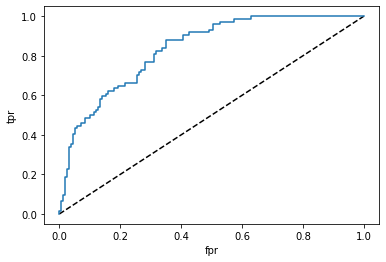

{'Accuracy': 0.7662337662337663,
 'Recall': 0.5,
 'Precision': 0.6851851851851852,
 'F1_score': 0.5781250000000001,
 'Auc': 0.6958598726114651}

In [216]:
classification_eva(y_test, perd_test, prob_test_1)

In [ ]:
prob_train_1=logR.predict_proba(x_train)[:, 1]
prob_test_1=logR.predict_proba(x_test)[:, 1]

In [218]:
new_pred_train=np.where(prob_train_1>=.2, 1,0)
new_pred_test=np.where(prob_test_1>=.2, 1,0)

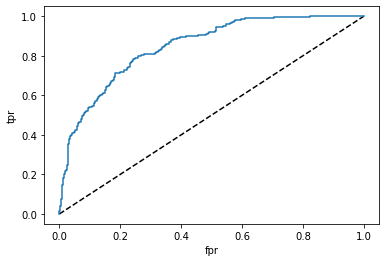

{'Accuracy': 0.6834264432029795,
 'Recall': 0.9020618556701031,
 'Precision': 0.5368098159509203,
 'F1_score': 0.673076923076923,
 'Auc': 0.7309143097592498}

In [219]:
classification_eva(y_train, new_pred_train, prob_train_1)

## Auc is a function of model it does not depend on prob cutoff